<a href="https://colab.research.google.com/github/jayakhan/document-classification/blob/main/naive_bayes_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Dataset

In [109]:
articles = []
labels = []
with open('/content/20ng-train-stemmed.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [110]:
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## Plot Distribution of Articles across Labels

In [111]:
labels = pd.DataFrame(labels_new)

In [112]:
LABELS = ['altatheism', 'compgraphics', 'composmswindowsmisc', 'compsysibmpchardware', 'compsysmachardware', 'compwindowsx', 'miscforsale', 'recautos', 'recmotorcycles', 'recsportbaseball',
              'recsporthockey', 'scicrypt', 'scielectronics', 'scimed', 'scispace', 'socreligionchristian', 'talkpoliticsgun', 'talkpoliticsmideast', 'talkpoliticsmisc', 'talkreligionmisc']

In [113]:
new = pd.DataFrame(0, index=np.arange(len(labels)), columns=LABELS)

In [114]:
new['recmotorcycles'] = np.where(labels == 'recmotorcycles', 1, 0)
new['recsportbaseball'] = np.where(labels == 'recsportbaseball', 1, 0)
new['recsporthockey'] = np.where(labels == 'recsporthockey', 1, 0)
new['scicrypt'] = np.where(labels == 'scicrypt', 1, 0)
new['scielectronics'] = np.where(labels == 'scielectronics', 1, 0)
new['scimed'] = np.where(labels == 'scimed', 1, 0)
new['scispace'] = np.where(labels == 'scispace', 1, 0)
new['socreligionchristian'] = np.where(labels == 'socreligionchristian', 1, 0)
new['talkpoliticsgun'] = np.where(labels == 'talkpoliticsgun', 1, 0)
new['talkpoliticsmideast'] = np.where(labels == 'talkpoliticsmideast', 1, 0)
new['talkpoliticsmisc'] = np.where(labels == 'talkpoliticsmisc', 1, 0)
new['talkreligionmisc'] = np.where(labels == 'talkreligionmisc', 1, 0)
new['recautos'] = np.where(labels == 'recautos', 1, 0)
new['altatheism'] = np.where(labels == 'altatheism', 1, 0)
new['compgraphics'] = np.where(labels == 'compgraphics', 1, 0)
new['composmswindowsmisc'] = np.where(labels == 'composmswindowsmisc', 1, 0)
new['compsysibmpchardware'] = np.where(labels == 'compsysibmpchardware', 1, 0)
new['compsysmachardware'] = np.where(labels == 'compsysmachardware', 1, 0)
new['compwindowsx'] = np.where(labels == 'compwindowsx', 1, 0)
new['miscforsale'] = np.where(labels == 'miscforsale', 1, 0)

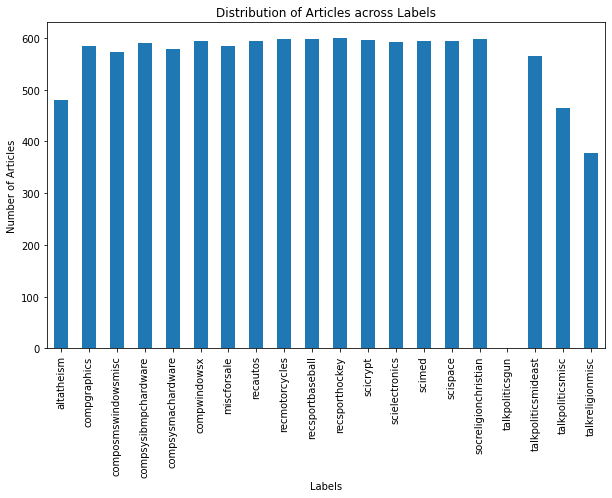

In [115]:
# Plot category data
plt.figure(figsize=(10,6))
new.sum(axis=0).plot.bar()
plt.xlabel("Labels")
plt.ylabel("Number of Articles")
plt.title("Distribution of Articles across Labels")
plt.show()

## Split data into 80% training and 20% validation datasets

In [116]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [117]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

7905
7905
3388
3388


## Lemmatization and Vectorization

In [118]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if len(t) >= 2]

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content', analyzer='word', stop_words='english',
                             tokenizer=LemmaTokenizer(), max_features=2000)

In [ ]:
X_train_cv = cv.fit_transform(train_articles)
X_test_cv = cv.transform(validation_articles)

## Model Building

In [ ]:
#Train the model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, train_labels)

In [122]:
#Predict Validation data on trained model
predictions = naive_bayes.predict(X_test_cv)

In [123]:
predictions

array(['recsporthockey', 'recsporthockey', 'talkpoliticsmideast', ...,
       'miscforsale', 'recmotorcycles', 'compsysibmpchardware'],
      dtype='<U20')

In [124]:
print('Accuracy score: ', accuracy_score(validation_labels, predictions))
print('Recall score: ', recall_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))
print('F1 score: ', f1_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))

Accuracy score:  0.8078512396694215
Recall score:  0.8078512396694215
F1 score:  0.8079655165202181
